<a href="https://colab.research.google.com/github/KazumaShachou/MachineLearningAndDeepLeaning/blob/master/Classification_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
x , y = mnist['data'], mnist['target']
x.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

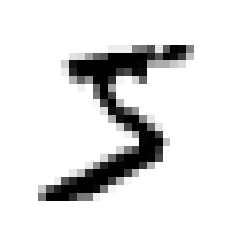

In [5]:
some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary,  interpolation='nearest')
plt.axis('off')
plt.show()


In [6]:
#this remember the number 5
y[0]

'5'

In [7]:
#let’s cast y to integers
import numpy as np

y = y.astype(np.uint8)


In [8]:
#The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)
x_train, x_test, y_train , y_test = x[:60000], x[:60000], y[:60000], y[:60000]

In [9]:
#Training a Binary Classifier
#This “5-detector" will distinguishing between 5 and not 5
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)



In [10]:
#Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(x_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
#detect images of the number 5
sgd_clf.predict([some_digit])

array([ True])

In [12]:
#Performance Measures
#Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


In [16]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf = clone(sgd_clf)
  x_train_folds = x_train[train_index]
  y_train_folds = y_train_5[train_index]
  x_test_fold = x_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred = clone_clf.predict(x_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
#dumb classifier that just classifies every single image in the “not-5”
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, x, y=None):
    pass
  def predict(self, x):
    return np.zeros((len(x), 1), dtype=bool)
    


In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv = 3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [ ]:
#Confusion Matrix
#it's a better way to evaluate the performance of a classifier
